In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [87]:
!pip install plotly

You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [88]:
import plotly.express as px

In [89]:
!pip install msgpack

You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [90]:
python -m pip install --upgrade pip

SyntaxError: invalid syntax (<ipython-input-90-0a8cf7b99133>, line 1)

In [91]:
dataset_df = pd.read_csv("C:/Users/snush/Downloads/USA_Housing.csv")

In [92]:
dataset_df = dataset_df.drop('Address', axis=1)

In [93]:
dataset_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06


In [94]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.5 KB


In [95]:
dataset_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [96]:
fig = px.histogram(dataset_df, x='Avg. Area Income', marginal='box', title='Avg. Area Income Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [97]:
fig = px.histogram(dataset_df, x='Avg. Area House Age', marginal='box', title='Avg. Area House Age Distribution', color_discrete_sequence=['red'])
fig.update_layout(bargap=0.1)
fig.show()

In [98]:
fig = px.histogram(dataset_df, x='Avg. Area Number of Rooms', title='Avg. Area Number of Rooms Distribution', marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [99]:
fig = px.histogram(dataset_df, x='Avg. Area Number of Bedrooms', title='Avg. Area Number of Bedrooms Distribution', nbins=round(6.5-2+1), color_discrete_sequence=['red'], marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [100]:
fig=px.histogram(dataset_df, x='Area Population', marginal='box', title='Area Population Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [101]:
dataset_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [102]:
fig = px.scatter(dataset_df, x='Avg. Area Income', y='Price', title='Avg. Area Income Vs Price')
fig.update_traces(marker_size=5)
fig.show()


In [103]:
print('Correlation Between Avg. Area Income And Price =',dataset_df['Price'].corr(dataset_df['Avg. Area Income']))

Correlation Between Avg. Area Income And Price = 0.6397337782571284


In [104]:
fig=px.scatter(dataset_df, x='Avg. Area House Age', y='Price', title='Avg. Area House Age Vs Price')
fig.update_traces(marker_size=5)
fig.show()

In [105]:
print('Correlation Between Avg. Area House Age And Price =',dataset_df['Price'].corr(dataset_df['Avg. Area House Age']))

Correlation Between Avg. Area House Age And Price = 0.4525425371785786


In [106]:
fig = px.scatter(dataset_df, x='Avg. Area Number of Rooms', y='Price', title='Avg. Area Number of Rooms Vs Price')
fig.update_traces(marker_size=5)
fig.show()

In [107]:
print('Correlation Between Avg. Area House Age And Price =',dataset_df['Price'].corr(dataset_df['Avg. Area Number of Rooms']))

Correlation Between Avg. Area House Age And Price = 0.33566445335939743


In [108]:
fig=px.violin(dataset_df, x='Avg. Area Number of Bedrooms', y='Price', title='Avg. Area Number of Bedrooms Vs Price')
fig.update_traces(marker_size=5)
fig.show()

In [109]:
print('Correlation Between Avg. Area House Age And Price =',dataset_df['Price'].corr(dataset_df['Avg. Area Number of Bedrooms']))

Correlation Between Avg. Area House Age And Price = 0.17107102765605364


In [110]:
fig = px.scatter(dataset_df, x='Area Population', y='Price', title='Area Population Vs Price')
fig.update_traces(marker_size=5)
fig.show()

In [111]:
print('Correlation Between Avg. Area House Age And Price =',dataset_df['Price'].corr(dataset_df['Area Population']))

Correlation Between Avg. Area House Age And Price = 0.4085558793209314


In [112]:
dataset_df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


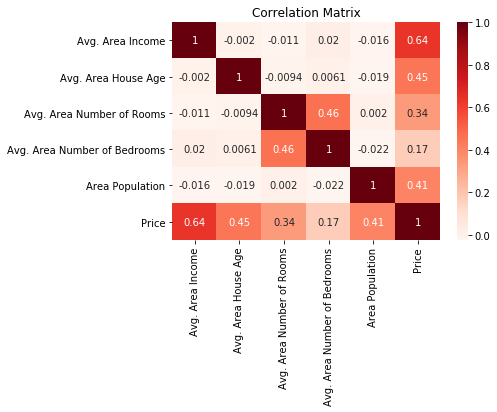

In [113]:
sns.heatmap(dataset_df.corr(), annot=True, cmap='Reds');
plt.title('Correlation Matrix');

In [114]:
!pip install seaborn --upgrade
import seaborn as sns
sns.__version__

Requirement already up-to-date: seaborn in c:\users\snush\ana23\lib\site-packages (0.11.2)
Requirement not upgraded as not directly required: numpy>=1.15 in c:\users\snush\ana23\lib\site-packages (from seaborn) (1.19.5)
Requirement not upgraded as not directly required: pandas>=0.23 in c:\users\snush\ana23\lib\site-packages (from seaborn) (0.23.0)
Requirement not upgraded as not directly required: matplotlib>=2.2 in c:\users\snush\ana23\lib\site-packages (from seaborn) (2.2.2)
Requirement not upgraded as not directly required: scipy>=1.0 in c:\users\snush\ana23\lib\site-packages (from seaborn) (1.1.0)
Requirement not upgraded as not directly required: pytz>=2011k in c:\users\snush\ana23\lib\site-packages (from pandas>=0.23->seaborn) (2018.4)
Requirement not upgraded as not directly required: python-dateutil>=2.5.0 in c:\users\snush\ana23\lib\site-packages (from pandas>=0.23->seaborn) (2.7.3)
Requirement not upgraded as not directly required: cycler>=0.10 in c:\users\snush\ana23\lib\sit

You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


'0.8.1'

In [133]:
X = np.array(dataset_df['Avg. Area Income'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [134]:
model = LinearRegression().fit(X, Y)

In [135]:
Y_pred = model.predict(X)

In [136]:
conda remove seaborn
conda install seaborn=0.9.0

SyntaxError: invalid syntax (<ipython-input-136-0dc59908f78c>, line 1)

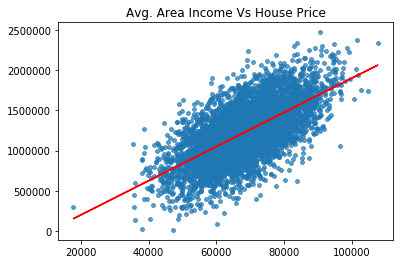

In [139]:
plt.scatter(data=dataset_df,x='Avg. Area Income', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Avg. Area Income Vs House Price');

In [138]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 271377.85601469857


In [122]:
X = np.array(dataset_df['Avg. Area House Age'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [123]:
model = LinearRegression().fit(X, Y)

In [124]:
Y_pred = model.predict(X)

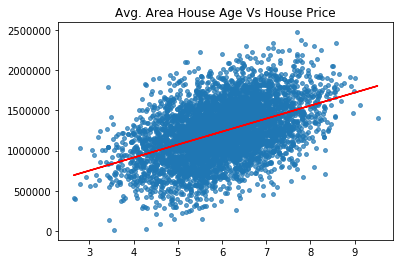

In [125]:
plt.scatter(data=dataset_df,x='Avg. Area House Age', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Avg. Area House Age Vs House Price');

In [126]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 314858.6165506047


In [127]:
X = np.array(dataset_df['Area Population'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [128]:
model = LinearRegression().fit(X, Y)

In [129]:
Y_pred = model.predict(X)

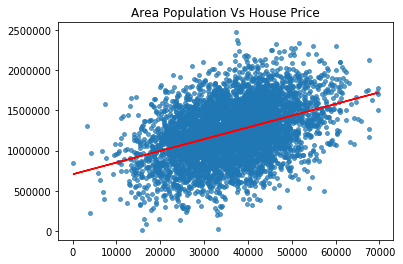

In [131]:
plt.scatter(data=dataset_df,x='Area Population', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Area Population Vs House Price');


In [ ]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

In [ ]:
X = np.array(dataset_df['Avg. Area Number of Rooms'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [ ]:
model = LinearRegression().fit(X, Y)

In [ ]:
Y_pred = model.predict(X)

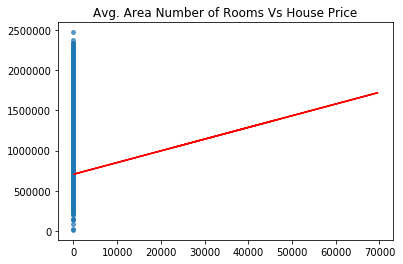

In [132]:
sns.scatterplot(data=dataset_df,x='Avg. Area Number of Rooms', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Avg. Area Number of Rooms Vs House Price');

In [140]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

Mean Squared Error = 271377.85601469857


In [141]:
X = np.array(dataset_df['Avg. Area Number of Bedrooms'])
X = X.reshape((-1,1))
Y = np.array(dataset_df['Price'])

In [142]:
model = LinearRegression().fit(X, Y)

In [ ]:
Y_pred = model.predict(X)

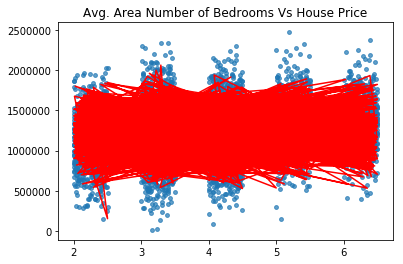

In [147]:
plt.scatter(data=dataset_df,x='Avg. Area Number of Bedrooms', y='Price', alpha=0.7, s=15)
plt.plot(X, Y_pred, color='r')
plt.title('Avg. Area Number of Bedrooms Vs House Price');

In [ ]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

In [ ]:
X = np.array(dataset_df[['Avg. Area Income','Avg. Area House Age']])
Y = np.array(dataset_df['Price'])

In [ ]:
model = LinearRegression().fit(X, Y)

In [ ]:
Y_pred = model.predict(X)

In [ ]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

In [ ]:
X = np.array(dataset_df[['Avg. Area Income','Avg. Area House Age','Area Population']])
Y = np.array(dataset_df['Price'])

In [ ]:
model = LinearRegression().fit(X, Y)

In [ ]:
Y_pred = model.predict(X)

In [ ]:
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

In [ ]:
X = np.array(dataset_df[['Avg. Area Income','Avg. Area House Age','Area Population','Avg. Area Number of Rooms']])
Y = np.array(dataset_df['Price'])
model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

In [ ]:
X = np.array(dataset_df[['Avg. Area Income','Avg. Area House Age','Area Population','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms']])
Y = np.array(dataset_df['Price'])
model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

In [ ]:
scaler = StandardScaler()
scaler.fit(dataset_df)
scaled_X = scaler.transform(dataset_df)
Y = np.array(dataset_df['Price'])
model = LinearRegression().fit(scaled_X, Y)
Y_pred = model.predict(scaled_X)
print('Mean Squared Error =',math.sqrt(metrics.mean_squared_error(Y, Y_pred)))

In [ ]:
X = np.array(dataset_df)
Y = np.array(dataset_df['Price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)
model = LinearRegression().fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
print('Mean Squared Training Error =',math.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)))
print('Mean Squared Testing Error =',math.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))